<a href="https://colab.research.google.com/github/ishujaswani/Predicting-Milk-productions/blob/main/Time_Series_Analysis_on_production_of_milk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TIME SERIES ANALYSIS

- Time series can have trends.
  - upward 
  - horizontal/ stationary 
  - downward

## STATSMODEL

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

In [ ]:
df=sm.datasets.macrodata.load_pandas().data #in order to load data from statsmodels
df

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [ ]:
#if you want information from statsmodels dataset then:
print(sm.datasets.macrodata.NOTE)

::
    Number of Observations - 203

    Number of Variables - 14

    Variable name definitions::

        year      - 1959q1 - 2009q3
        quarter   - 1-4
        realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
                    seasonally adjusted annual rate)
        realcons  - Real personal consumption expenditures (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realinv   - Real gross private domestic investment (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realgovt  - Real federal consumption expenditures & gross investment
                    (Bil. of chained 2005 US$, seasonally adjusted annual rate)
        realdpi   - Real private disposable income (Bil. of chained 2005
                    US$, seasonally adjusted annual rate)
        cpi       - End of the quarter consumer price index for all urban
                    consumers: all items (1982-84 = 100, seasonally adju

In [ ]:
#we can convert years data to date by using pandas
#BUT statsmodels also has the capability to do that:
df.index = pd.Index(sm.tsa.datetools.dates_from_range('1959Q1','2009Q3'))

In [ ]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


<AxesSubplot:>

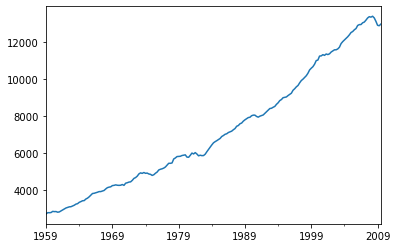

In [ ]:
df['realgdp'].plot()

In [ ]:
#we are gonna use stats model to get the trend.
result=sm.tsa.filters.hpfilter(df['realgdp'])

In [ ]:
type(result)

tuple

In [ ]:
#this hpfilter gives a tuple. 1- is the cycle and 2- is the trend
#in order to catch the trend line we can store that tuple into two diff vars
gdp_cycle,gdp_trend=sm.tsa.filters.hpfilter(df['realgdp'])

In [ ]:
#adding a trend coloum to the df
df['trend'] = gdp_trend
df['Cycle'] = gdp_cycle

<AxesSubplot:>

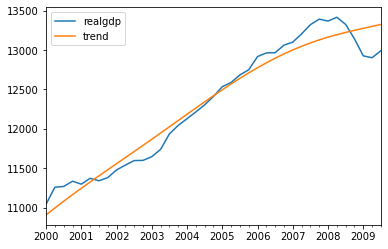

In [ ]:
#ploting the realgdp with the trend line in order to show the trend of the realgdp.
df[['realgdp','trend']]['2000-03-31':].plot()

# ETS MODELS

ETS - Error-Trend and Seasonality
  - Exponentional smoothing
  - Trend methods models
  - ETS decomposition
All these are related to the general idea of ETS model.


When working with a time series data you will have a 
1. error term 
2. trend term 
3. seasonality term
Based of these factors we can fit a model for our data.

How to break down time series into each of these terms?
- Time series decomposition is a good way to get those three terms. and visualising those will be a good way to check their behavior.
- after plotting the graph will give 4 rows of visualisation which will consist of 
   - observed (actual data)
   - Trend (the trend line of the data)
   - Seaonality (if the data is seasonal or not)
   - residual (the error term which means that it is not explained by the seasonl term or the trend term)

## ETS Code

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [ ]:
os.chdir('/Users/pradeepjaswani/Documents/python_trading/Python-for-Finance-Repo-master/08-Time-Series-Analysis')

In [ ]:
airline1 = pd.read_csv('airline_passengers.csv',index_col= 'Month')
airline1.dropna(inplace=True)

In [ ]:
airline1.index=pd.to_datetime(airline1.index)

In [ ]:
airline1.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<AxesSubplot:xlabel='Month'>

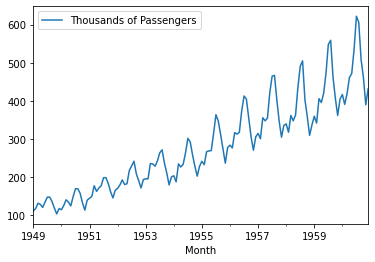

In [ ]:
airline1.plot()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
result=seasonal_decompose(airline1['Thousands of Passengers'],model='multiplicative')
# there are two tyoes of models in this there is an additive and multiplicative model in order to choose the 
# correct one you may need to guess and check here, from the look here you can say its a linear model, its also
# a little exponential therefore, here the multiplicative model is better usedd.

<AxesSubplot:xlabel='Month'>

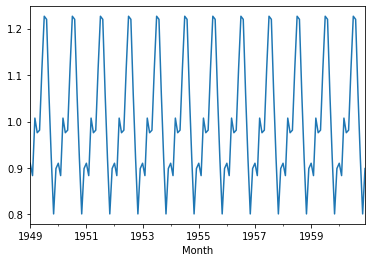

In [ ]:
result.seasonal.plot()
#just the seasonal component of the data

<AxesSubplot:xlabel='Month'>

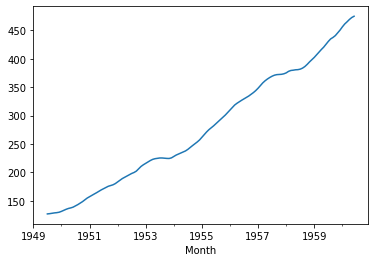

In [ ]:
result.trend.plot()
#switching to additive model will give the same trend graph,
# in our case additive or multiplicative did not make any diff because the original grapph is similar to 
# linear g or expo g 

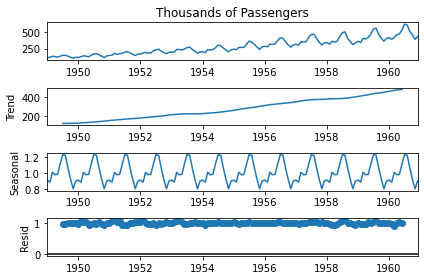

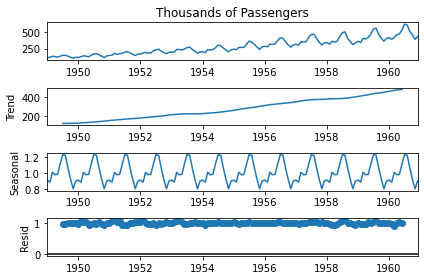

In [ ]:
result.plot()

# EWMA

1. We can improve simple moving average by calculating exponential moving average.
    Simple moving avg has a weakness 
    - a smaller window will create more noise than signal.
    - Its always going to lag by the size of the actual window (you will always have missing data at the very first point
    - its never going to actually going to reach the full peak or value of the data due to averaging.
    - it aslo doesnt inform you about future behavior all it does is inform about the trend in the data.
    - extreme historical values can skew your sma significantly
2. In order to fix some of these issues we are going to use EWMA ( exponentially-weighted moving average) How does it work?
    - it will allow us to remove the lag effect from a sma.
    - It will put more weight on values that occured more recently ( therefore, as the values get closer to the present time we actualy apply more weight to the values while calculating the average.
    - the amount of weight appled will be based on the parameters and teh number of periods given. you can play around with that in pandas untill you get the desired result.


## EWMA CODE

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [ ]:
os.chdir('/Users/pradeepjaswani/Documents/python_trading/Python-for-Finance-Repo-master/08-Time-Series-Analysis')

In [ ]:
airline = pd.read_csv('airline_passengers.csv',index_col = 'Month')

In [ ]:
airline.dropna(inplace=True)

In [ ]:
airline.head()

,Thousands of Passengers
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0


In [ ]:
airline.index = pd.to_datetime(airline.index)

In [ ]:
airline.columns

Index(['Thousands of Passengers'], dtype='object')

In [ ]:
# SMA
airline['Sma-6'] = airline['Thousands of Passengers'].rolling(window=6).mean()
airline['Sma-12'] = airline['Thousands of Passengers'].rolling(window=12).mean()

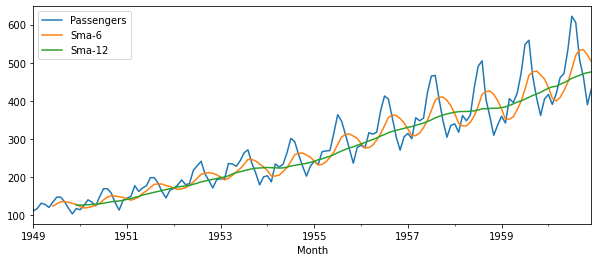

In [ ]:
airline['Thousands of Passengers'].plot(label = 'Passengers',figsize=(10,4))
airline['Sma-6'].plot(label='Sma-6')
airline['Sma-12'].plot(label='Sma-12')
plt.legend()

In [ ]:
airline['EWMA-12'] = airline['Thousands of Passengers'].ewm(span=12).mean()

<AxesSubplot:xlabel='Month'>

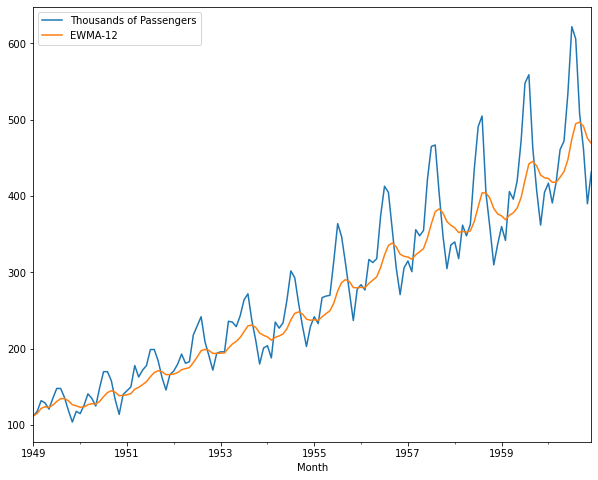

In [ ]:
airline[['Thousands of Passengers','EWMA-12']].plot(figsize=(10,8))
#as you can see there is more seasonality is more evident on the end as we have weighed more 

# ARIMA

ARIMA and ARMA are used to better understand the data or predict the future (forecasting)

ARIMA has 2 types
- seasonal arima 
- non seasonal arima
ARIMA models are applied where data shows evidence of non-stationarity.
Generally arima models are denoted as arima(p,d,q), where the parameters p,d,q are non negetive integers.
1. P (AR) - auto-regressive
    - it means it utilises the dependent relationship between the current obdervation and the previous ovservations (this is basic regression task)
2. (d) integrated
    - Subtracting an observation from an observation at the previous time step so as to remove stationary.
3. (q) (MR) Moving Average
    - MA used dependency between an observation (1) and a residual error from a moving average model applied to lagged observations (2).

Stationary vs Non Stationary

Stationary 
1. A Stationary data set has a constant mean and variance overtime. A stationary data set will allow our models to predict that mean and variance will be same in future periods. Variance should not ba a function of time. Covariance should not be a function of time( which means how fast the variance is changing over time ). 
You dont have to look at the graphs and test it there are various mathematical tests for this, the most popular is the augmented dickey fuller test. (how to use with python stats models.

Once i have evaluated that the data is not stationary by using the dickey fuller test then i will have to transform it into stationary.

Simple way to do it is via diffrencing.


In [ ]:
tsa = pd.DataFrame([10,12,8,14,7],columns=['nums'])

In [ ]:
tsa.index=['Times1','Times2','Times3','Times4','Times5']

In [ ]:
tsa["nums1"]=tsa['nums'].shift(periods=1)

In [ ]:
tsa['diff1']=tsa['nums']-tsa['nums1']

In [ ]:
tsa['nums2']=tsa['diff1'].shift(periods=1)

In [ ]:
tsa['diff2']=tsa['diff1']-tsa['nums2']

In [ ]:
tsa.drop(['nums1','nums2'],axis=1)

,nums,diff1,diff2
Times1,10,NaN,NaN
Times2,12,2.0,NaN
Times3,8,-4.0,-6.0
Times4,14,6.0,10.0
Times5,7,-7.0,-13.0


In [ ]:
#once we difference it and our data is still not stationary, we difference it once again with the same 
# idea to make it stationary

Diffrencing for seasonal data is also easy 
eg if the data set has yearly seasons and the data is given monthly, you can difference it by 12 instead of 1.

# ACF & PACF

AUTOCOREALTION PLOTS

ACF (better for identifying MA models)

- shows the corelation of the time series with itself lagged by x amount of time units.

1. if autocorrealtion plot shows positive autocorelation at the first lag then it suggests to use the AR terms in relation to thr lag.

2. if autocorealtion plot shows negative autocorealtion at the first lag then it suggests to use the MA terms in the relation to the lag 
    
    1. P - number of lag observations in the model 
    2. D - number of times the raw observations are differenced
    3. Q- size of the moving average window. also called the order of the moving average
    
PACF (better for identifying AR model)
- Conditional Correaltion
eg a regression - y = x1,x2,x3. 
The partial correaltion b/w y & x3 is the correaltion b/w the variables determined taking into account how both y and x3 are related to X1 and X2

1. A sharp dropoff after lag-K suggests we should use AR-K model
2. A gradual decline suggests MA model


# ARIMA MODEL USING STATSMODEL 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import os
from datetime import datetime

In [ ]:
os.chdir('/Users/pradeepjaswani/Documents/python_trading/Python-for-Finance-Repo-master/08-Time-Series-Analysis')

In [ ]:
df = pd.read_csv('monthly-milk-production-pounds-p.csv')

In [ ]:
df.dropna(inplace=True)

In [ ]:
df['Month']=pd.to_datetime(df['Month'])

In [ ]:
df.set_index('Month',inplace=True)

In [ ]:
df.index

DatetimeIndex(['1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01',
               '1962-05-01', '1962-06-01', '1962-07-01', '1962-08-01',
               '1962-09-01', '1962-10-01',
               ...
               '1975-03-01', '1975-04-01', '1975-05-01', '1975-06-01',
               '1975-07-01', '1975-08-01', '1975-09-01', '1975-10-01',
               '1975-11-01', '1975-12-01'],
              dtype='datetime64[ns]', name='Month', length=168, freq=None)

In [ ]:
df.columns = ['milk in pounds']

In [ ]:
df

,milk in pounds
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0
...,...
1975-08-01,858.0
1975-09-01,817.0
1975-10-01,827.0


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
milk in pounds,168.0,754.708333,102.204524,553.0,677.75,761.0,824.5,969.0


<AxesSubplot:xlabel='Month'>

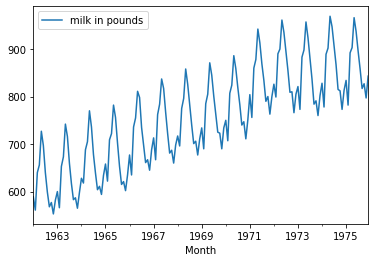

In [ ]:
df.plot()

In [ ]:
#calculate moving avg
# df['12 month MA']=df['milk in pounds'].rolling(12).mean()
# df['12 month STD']=df['milk in pounds'].rolling(12).std()
# df.plot()

In [ ]:
#ETS decompose
from statsmodels.tsa.seasonal import seasonal_decompose


In [ ]:
decomp = seasonal_decompose(df)

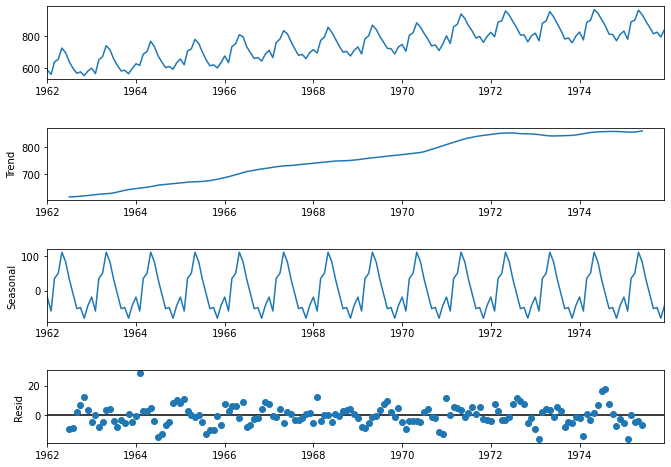

In [ ]:
fig = decomp.plot()
fig.set_size_inches(10,7)

In [ ]:
df.head()

,milk in pounds
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [ ]:
#to check whether the data is stationary or not you have to check it with the augmented dickey fuller unit root
# test. it is a statistical test which has a null hypothesis that it is a non stationary time series. alt 
# hypothesis is that the seires has no unit root and is stationary.
#  p-value - small p val less than 0.05 indicates strong evidennce against the null hypothesis. therefore we
# reject the null hypothesis. p val greater than 0.05 indicates weak evidence against null hyp, therefore we
# we fail to reject null hyp.

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
result = adfuller(df['milk in pounds'])

In [ ]:
result

(-1.3038115874221246,
 0.627426708603034,
 13,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 1115.1730447395112)

In [ ]:
def adf_check(time_series):
    result = adfuller(time_series)
    print('Augmented dickey fuller test')
    labels=['ADF test statistics','P-values','Number of Lags','Number of obs']
    
    for value,label in zip(result,labels):
        print(label+" : "+str(value))
    if result[1] <= 0.05:
        print('Strong evedince against null hypothesis')
        print('Reject the null hypothesis')
        print('Data has no unit root and is stationary')
    else:
        print('Weak evidence against null hypothesis')
        print('Fail to reject null hypothesis')
        print('Data has a unit root and it is Non-Stationary')
        

In [ ]:
adf_check(df['milk in pounds'])

Augmented dickey fuller test
ADF test statistics : -1.3038115874221246
P-values : 0.627426708603034
Number of Lags : 13
Number of obs : 154
Weak evidence against null hypothesis
Fail to reject null hypothesis
Data has a unit root and it is Non-Stationary


In [ ]:
#clearly from the graph we understood that the data is nonstationary.

In [ ]:
#in order to make it stationary we have to do diffrencing.

In [ ]:
df['lag 1 in milk'] = df['milk in pounds'].shift(periods=1)
df['differencing 1 in milk']=df['milk in pounds']-df['lag 1 in milk']

In [ ]:
adf_check(df['differencing 1 in milk'].dropna())

Augmented dickey fuller test
ADF test statistics : -3.0549955586530553
P-values : 0.03006800400178688
Number of Lags : 14
Number of obs : 152
Strong evedince against null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


<AxesSubplot:xlabel='Month'>

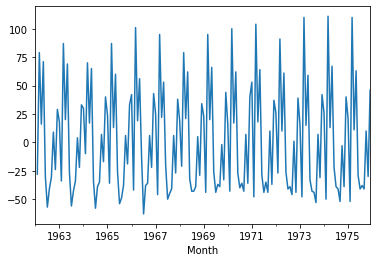

In [ ]:
df['differencing 1 in milk'].plot()

In [ ]:
# but lets say this still wasnt enough to make it stationary
df['difference 2 in milk'] = df['differencing 1 in milk']-df['differencing 1 in milk'].shift(1)

<AxesSubplot:xlabel='Month'>

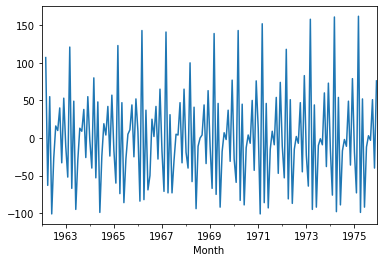

In [ ]:
df['difference 2 in milk'].plot()

In [ ]:
adf_check(df['difference 2 in milk'].dropna())

Augmented dickey fuller test
ADF test statistics : -14.327873645603336
P-values : 1.1126989332083069e-26
Number of Lags : 11
Number of obs : 154
Strong evedince against null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [ ]:
df['seasonal difference for milk'] = df['milk in pounds'] - df['milk in pounds'].shift(12)

<AxesSubplot:xlabel='Month'>

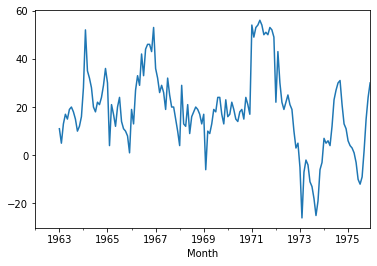

In [ ]:
df['seasonal difference for milk'].plot()

In [ ]:
adf_check(df['seasonal difference for milk'].dropna())

Augmented dickey fuller test
ADF test statistics : -2.3354193143593993
P-values : 0.16079880527711304
Number of Lags : 12
Number of obs : 143
Weak evidence against null hypothesis
Fail to reject null hypothesis
Data has a unit root and it is Non-Stationary


In [ ]:
df['seasonal first difference']= df['differencing 1 in milk']-df['differencing 1 in milk'].shift(12)

<AxesSubplot:xlabel='Month'>

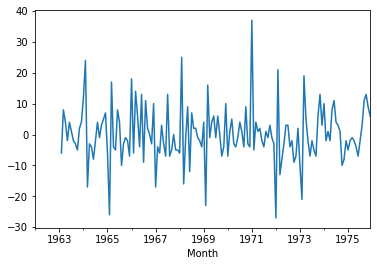

In [ ]:
df['seasonal first difference'].plot()

In [ ]:
adf_check(df['seasonal first difference'].dropna())

Augmented dickey fuller test
ADF test statistics : -5.038002274921985
P-values : 1.86542343187882e-05
Number of Lags : 11
Number of obs : 143
Strong evedince against null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


# ACF and PACF

In [ ]:
df.head()

,milk in pounds,lag 1 in milk,differencing 1 in milk,difference 2 in milk,seasonal difference for milk,seasonal first difference
Month,,,,,,
1962-01-01,589.0,NaN,NaN,NaN,NaN,NaN
1962-02-01,561.0,589.0,-28.0,NaN,NaN,NaN
1962-03-01,640.0,561.0,79.0,107.0,NaN,NaN
1962-04-01,656.0,640.0,16.0,-63.0,NaN,NaN
1962-05-01,727.0,656.0,71.0,55.0,NaN,NaN


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

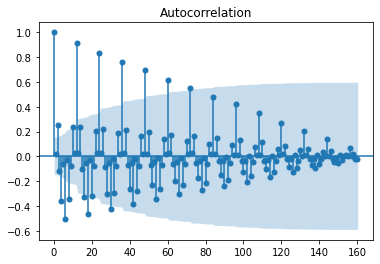

In [ ]:
fig_first= plot_acf(df['differencing 1 in milk'].dropna(),lags=160)

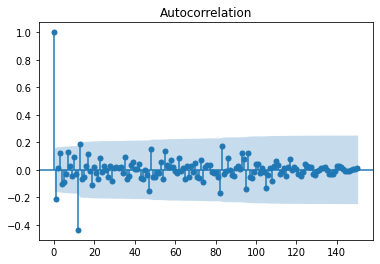

In [ ]:
fig_seasonal_first = plot_acf(df['seasonal first difference'].dropna(),lags=150)

In [ ]:
from pandas.plotting import autocorrelation_plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

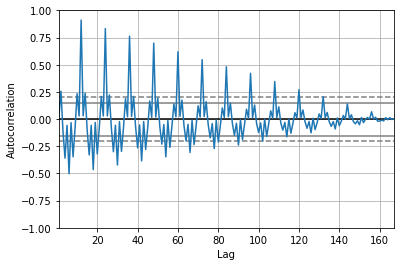

In [ ]:
autocorrelation_plot(df['differencing 1 in milk'].dropna())

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

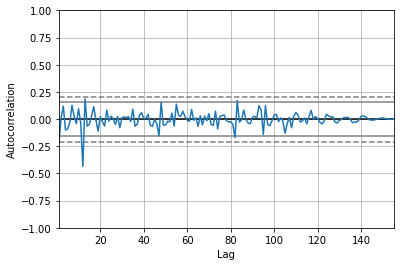

In [ ]:
autocorrelation_plot(df['seasonal first difference'].dropna())

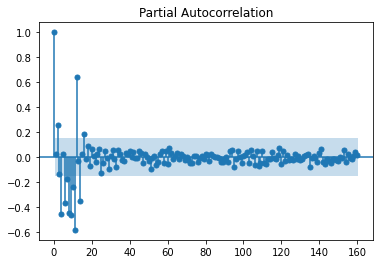

In [ ]:
fig1= plot_pacf(df['differencing 1 in milk'].dropna(),lags=160,method='ywm')

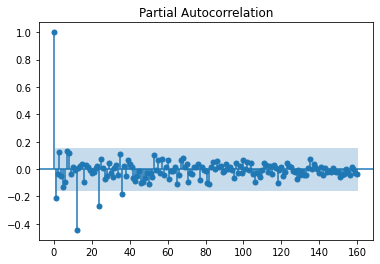

In [ ]:
fig_first= plot_pacf(df['seasonal first difference'].dropna(),method='ywm',lags=160)
#yule - walker model

In [ ]:
# pacf interpretation usually when there is a sudden drop off after lag-K then we use the suto-regresive 
# model of K 

# and of there is a gradual decline then we use the MA model

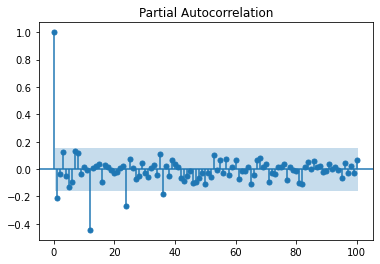

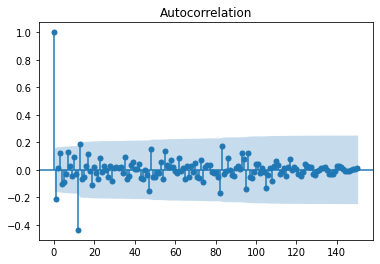

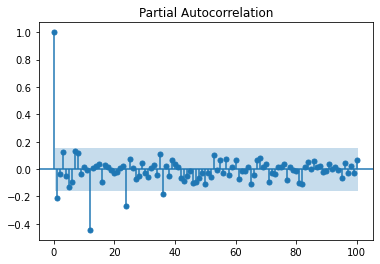

In [ ]:
plot_acf(df['seasonal first difference'].dropna(),lags=150)
plot_pacf(df['seasonal first difference'].dropna(),lags=100,method='ywm')

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
help(ARIMA)

Help on class ARIMA in module statsmodels.tsa.arima_model:

class ARIMA(ARMA)
 |  ARIMA(endog, order, exog=None, dates=None, freq=None, missing='none')
 |  
 |  Autoregressive Integrated Moving Average ARIMA(p,d,q) Model
 |  
 |  Parameters
 |  ----------
 |  endog : array_like
 |      The endogenous variable.
 |  order : iterable
 |      The (p,d,q) order of the model for the number of AR parameters,
 |      differences, and MA parameters to use.
 |  exog : array_like, optional
 |      An optional array of exogenous variables. This should *not* include a
 |      constant or trend. You can specify this in the `fit` method.
 |  dates : array_like, optional
 |      An array-like object of datetime objects. If a pandas object is given
 |      for endog or exog, it is assumed to have a DateIndex.
 |  freq : str, optional
 |      The frequency of the time-series. A Pandas offset or 'B', 'D', 'W',
 |      'M', 'A', or 'Q'. This is optional if dates are given.
 |  
 |  
 |  Notes
 |  -----
 |

In [ ]:
model = sm.tsa.statespace.SARIMAX(df['milk in pounds'],order=(0,1,0),seasonal_order=(1,1,1,12))

/Users/pradeepjaswani/opt/anaconda3/envs/pyfinance/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/pradeepjaswani/opt/anaconda3/envs/pyfinance/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [ ]:
result = model.fit()

In [ ]:
print(result.summary())

                                      SARIMAX Results                                       
Dep. Variable:                       milk in pounds   No. Observations:                  168
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -534.065
Date:                              Tue, 15 Dec 2020   AIC                           1074.131
Time:                                      16:59:39   BIC                           1083.261
Sample:                                  01-01-1962   HQIC                          1077.839
                                       - 12-01-1975                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0449      0.106     -0.422      0.673      -0.253       0.163
ma.S.L12      -0.58

In [ ]:
result.resid

Month
1962-01-01    589.000000
1962-02-01    -28.000000
1962-03-01     79.000000
1962-04-01     16.000000
1962-05-01     71.000000
                 ...    
1975-08-01      2.641383
1975-09-01      8.158731
1975-10-01      7.676817
1975-11-01      6.572500
1975-12-01      5.936354
Length: 168, dtype: float64

<AxesSubplot:xlabel='Month'>

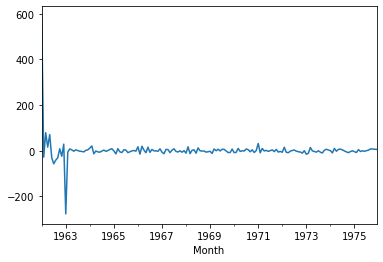

In [ ]:
result.resid.plot()

<AxesSubplot:ylabel='Density'>

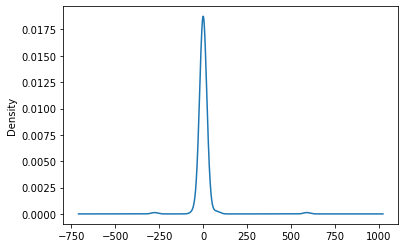

In [ ]:
result.resid.plot(kind="kde")

In [ ]:
# all close to 0. which is good

<AxesSubplot:xlabel='Month'>

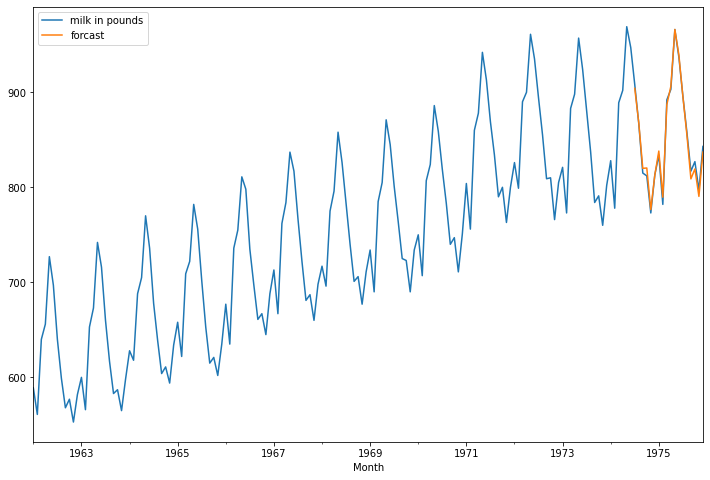

In [ ]:
df['forcast']=result.predict(start=150,end=250)
df[['milk in pounds','forcast']].plot(figsize=(12,8))

In [ ]:
# we see that the prediction is till max 168 days this is a problem as we dont have extra time frames in our
# dataframe we can create more time periods in pandas

In [ ]:
df.tail()

,milk in pounds,lag 1 in milk,differencing 1 in milk,difference 2 in milk,seasonal difference for milk,seasonal first difference,forcast
Month,,,,,,,
1975-08-01,858.0,896.0,-38.0,3.0,-9.0,3.0,855.358617
1975-09-01,817.0,858.0,-41.0,-3.0,2.0,11.0,808.841269
1975-10-01,827.0,817.0,10.0,51.0,15.0,13.0,819.323183
1975-11-01,797.0,827.0,-30.0,-40.0,24.0,9.0,790.427500
1975-12-01,843.0,797.0,46.0,76.0,30.0,6.0,837.063646


In [ ]:
# we add on more time frames with empty values. even tho values are empty we can srill forcast on them.


In [ ]:
from pandas.tseries.offsets import DateOffset

In [ ]:
fd = [df.index[-1] + DateOffset(months=x) for x in range(1,48)]

In [ ]:
fd

[Timestamp('1976-01-01 00:00:00'),
 Timestamp('1976-02-01 00:00:00'),
 Timestamp('1976-03-01 00:00:00'),
 Timestamp('1976-04-01 00:00:00'),
 Timestamp('1976-05-01 00:00:00'),
 Timestamp('1976-06-01 00:00:00'),
 Timestamp('1976-07-01 00:00:00'),
 Timestamp('1976-08-01 00:00:00'),
 Timestamp('1976-09-01 00:00:00'),
 Timestamp('1976-10-01 00:00:00'),
 Timestamp('1976-11-01 00:00:00'),
 Timestamp('1976-12-01 00:00:00'),
 Timestamp('1977-01-01 00:00:00'),
 Timestamp('1977-02-01 00:00:00'),
 Timestamp('1977-03-01 00:00:00'),
 Timestamp('1977-04-01 00:00:00'),
 Timestamp('1977-05-01 00:00:00'),
 Timestamp('1977-06-01 00:00:00'),
 Timestamp('1977-07-01 00:00:00'),
 Timestamp('1977-08-01 00:00:00'),
 Timestamp('1977-09-01 00:00:00'),
 Timestamp('1977-10-01 00:00:00'),
 Timestamp('1977-11-01 00:00:00'),
 Timestamp('1977-12-01 00:00:00'),
 Timestamp('1978-01-01 00:00:00'),
 Timestamp('1978-02-01 00:00:00'),
 Timestamp('1978-03-01 00:00:00'),
 Timestamp('1978-04-01 00:00:00'),
 Timestamp('1978-05-

In [ ]:
#concat fd 

In [ ]:
fdf= pd.DataFrame(index=fd,columns=df.columns)

In [ ]:
fdf

,milk in pounds,lag 1 in milk,differencing 1 in milk,difference 2 in milk,seasonal difference for milk,seasonal first difference,forcast
1976-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
finaldf = pd.concat([df,fdf])

In [ ]:
finaldf.tail()

,milk in pounds,lag 1 in milk,differencing 1 in milk,difference 2 in milk,seasonal difference for milk,seasonal first difference,forcast
1979-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

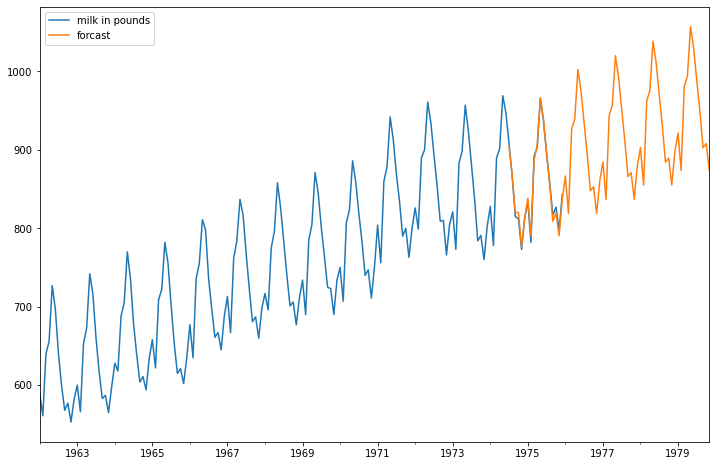

In [ ]:
#now that we have empty rows we can forcast.
finaldf['forcast']=result.predict(start=150,end=216)
finaldf[['milk in pounds','forcast']].plot(figsize=(12,8))